# Proyek Analisis Data: E-Commerce Public
- **Nama:** Julianti
- **Email:** mc172d5x1418@student.devacademy.id
- **ID Dicoding:** MC172D5X1418

## Menentukan Pertanyaan Bisnis

• **Pertanyaan 1 (Pola):** Bagaimana pola penggunaan sepeda sewaan berubah berdasarkan waktu (harian, mingguan, bulanan, tahunan) dan faktor-faktor seperti musim dan hari libur?
  
• **Pertanyaan 2 (Menemukan Hubungan):** Faktor-faktor apa (cuaca, suhu, kelembapan, kecepatan angin) yang paling signifikan memengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [182]:
# Memuat tabel day
day_df = pd.read_csv(r"C:\submission\data\day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**

**Dataset day (day.csv):**
Dataset `day.csv` memiliki dimensi 731 baris dan 16 kolom. Setiap baris merepresentasikan data harian penyewaan sepeda. Berikut adalah kolom-kolom yang terdapat dalam dataset ini:

*   **instant:**  Index record (integer), menunjukkan nomor urut data.
*   **dteday:** Tanggal (object/string),  format YYYY-MM-DD, merepresentasikan tanggal observasi harian.
*   **season:** Musim (integer),  dengan nilai 1 untuk Spring, 2 untuk Summer, 3 untuk Fall, dan 4 untuk Winter.
*   **yr:** Tahun (integer),  0 untuk tahun 2011 dan 1 untuk tahun 2012.
*   **mnth:** Bulan (integer),  nilai dari 1 hingga 12 merepresentasikan bulan Januari hingga Desember.
*   **holiday:** Hari Libur (integer), 1 menunjukkan hari libur dan 0 sebaliknya.
*   **weekday:** Hari dalam seminggu (integer),  nilai dari 0 hingga 6, dengan 0 mewakili hari Minggu dan 6 mewakili hari Sabtu.
*   **workingday:** Hari Kerja (integer), 1 menunjukkan hari kerja dan 0 sebaliknya.
*   **weathersit:** Kondisi Cuaca (integer),
    *   1: Clear, Few clouds, Partly cloudy, Cloudy
    *   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    *   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    *   4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
*   **temp:** Temperatur ternormalisasi dalam Celsius (float),  nilai dinormalisasi antara -8 hingga +39 derajat Celsius.
*   **atemp:** Temperatur 'feels like' ternormalisasi dalam Celsius (float),  nilai dinormalisasi antara -16 hingga +50 derajat Celsius.
*   **hum:** Kelembapan ternormalisasi (float),  nilai dinormalisasi antara 0 hingga 1.
*   **windspeed:** Kecepatan angin ternormalisasi (float),  nilai dinormalisasi antara 0 hingga 1.
*   **casual:** Jumlah penyewaan kasual (integer),  jumlah penyewaan untuk pengguna tidak terdaftar.
*   **registered:** Jumlah penyewaan terdaftar (integer), jumlah penyewaan untuk pengguna terdaftar.
*   **cnt:** Total penyewaan (integer),  jumlah total penyewaan sepeda, merupakan penjumlahan dari kolom 'casual' dan 'registered'.

Dataset ini menyediakan data harian selama dua tahun (2011 dan 2012) dengan berbagai informasi terkait waktu, musim, kondisi hari (libur/kerja), cuaca, dan temperatur, serta jumlah penyewaan sepeda yang dibedakan antara pengguna kasual dan terdaftar.

In [183]:
# Memuat tabel day
hour_df = pd.read_csv(r"C:\submission\data\hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**

Dataset `hour.csv` memiliki dimensi 17379 baris dan 17 kolom. Setiap baris merepresentasikan data penyewaan sepeda per jam. Berikut adalah kolom-kolom yang terdapat dalam dataset ini:

*   **instant:** Index record (integer), menunjukkan nomor urut data.
*   **dteday:** Tanggal (object/string),  format YYYY-MM-DD, merepresentasikan tanggal observasi harian.
*   **season:** Musim (integer),  dengan nilai 1 untuk Spring, 2 untuk Summer, 3 untuk Fall, dan 4 untuk Winter.
*   **yr:** Tahun (integer),  0 untuk tahun 2011 dan 1 untuk tahun 2012.
*   **mnth:** Bulan (integer),  nilai dari 1 hingga 12 merepresentasikan bulan Januari hingga Desember.
*   **hr:** Jam (integer),  nilai dari 0 hingga 23, merepresentasikan jam dalam sehari (format 24 jam).
*   **holiday:** Hari Libur (integer), 1 menunjukkan hari libur dan 0 sebaliknya.
*   **weekday:** Hari dalam seminggu (integer),  nilai dari 0 hingga 6, dengan 0 mewakili hari Minggu dan 6 mewakili hari Sabtu.
*   **workingday:** Hari Kerja (integer), 1 menunjukkan hari kerja dan 0 sebaliknya.
*   **weathersit:** Kondisi Cuaca (integer),
    *   1: Clear, Few clouds, Partly cloudy, Cloudy
    *   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    *   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    *   4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
*   **temp:** Temperatur ternormalisasi dalam Celsius (float),  nilai dinormalisasi antara -8 hingga +39 derajat Celsius.
*   **atemp:** Temperatur 'feels like' ternormalisasi dalam Celsius (float),  nilai dinormalisasi antara -16 hingga +50 derajat Celsius.
*   **hum:** Kelembapan ternormalisasi (float),  nilai dinormalisasi antara 0 hingga 1.
*   **windspeed:** Kecepatan angin ternormalisasi (float),  nilai dinormalisasi antara 0 hingga 1.
*   **casual:** Jumlah penyewaan kasual (integer),  jumlah penyewaan untuk pengguna tidak terdaftar.
*   **registered:** Jumlah penyewaan terdaftar (integer), jumlah penyewaan untuk pengguna terdaftar.
*   **cnt:** Total penyewaan (integer),  jumlah total penyewaan sepeda, merupakan penjumlahan dari kolom 'casual' dan 'registered'.

Dataset ini menyediakan data per jam selama dua tahun (2011 dan 2012) dengan informasi detail hingga level jam, mencakup musim, kondisi hari (libur/kerja), cuaca, temperatur, dan jumlah penyewaan sepeda (kasual dan terdaftar). Dataset `hour.csv` memberikan granularitas data yang lebih tinggi dibandingkan `day.csv` karena mencatat data setiap jam.

### Assessing Data

In [184]:
# Menilai data day_df
day_df.info()

# Memeriksa missing value (NA) pada data day_df
print(day_df.isna().sum())

# Memeriksa duplikasi pada data day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())

# Memeriksa parameter statistik
print(day_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday      

**Insight:**

**Assessing Data - Dataset day (day_df):**

*   **`day_df.info()`:**
    *   Dataset `day_df` terdiri dari 731 baris data dan 16 kolom.
    *   Memori yang digunakan dataset ini adalah 91.5 KB.
    *   Sebanyak 15 kolom memiliki tipe data numerik (*int64* dan *float64*).
    *   Kolom `dteday` memiliki tipe data *object*, yang perlu diubah ke tipe *datetime* untuk analisis tanggal.
    *   Tidak ada kolom dengan nilai *null* atau *non-null count* yang kurang dari 731, menandakan tidak ada *missing values*.

*   **`day_df.isna().sum()`:**
    *   Tidak ada nilai *missing* (NA) di seluruh kolom dataset. Semua kolom menunjukkan angka 0 untuk jumlah nilai *missing*.

*   **`day_df.duplicated().sum()`:**
    *   Tidak ditemukan adanya baris duplikat dalam dataset. Jumlah baris duplikat adalah 0.

*   **`day_df.describe()`:**
    *   Rata-rata nilai pada kolom `cnt` (total penyewaan) adalah 4504.
    *   Nilai tengah (median/50%) pada kolom `cnt` adalah 4548, yang tidak jauh berbeda dari nilai rata-rata, mengindikasikan distribusi yang relatif simetris.
    *   Rentang nilai kolom `cnt` adalah dari 22 hingga 8714, menunjukkan variasi yang signifikan dalam jumlah penyewaan harian.
    *   Kuartil bawah (25%) kolom `cnt` berada di 3152 dan kuartil atas (75%) berada di 5956, memperlihatkan sebaran data penyewaan di sekitar nilai tengah.
    *   Nilai maksimum kolom `casual` (3410) lebih tinggi dari kuartil atasnya, demikian pula dengan kolom `registered` (6946) dan `cnt` (8714), mengindikasikan adanya hari-hari dengan jumlah penyewaan yang jauh lebih tinggi dari sebaran umum data.

In [185]:
# Menilai data hour_df
hour_df.info()

# Memeriksa missing value (NA) pada data hour_df
print(hour_df.isna().sum())

# Memeriksa duplikasi pada data hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

# Memeriksa parameter statistik
print(hour_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
instant       0
dteday        0
season        0
y

**Insight:**

**Assessing Data - Dataset hour (hour):**

*   **`hour_df.info()`:**
    *   Dataset `hour_df` memiliki 17379 baris data dan 17 kolom.
    *   Penggunaan memori dataset ini lebih besar dari `day_df`, yaitu 2.3 MB, karena jumlah barisnya lebih banyak.
    *   Terdapat 16 kolom dengan tipe data numerik (*int64* dan *float64*).
    *   Sama seperti `day_df`, kolom `dteday` memiliki tipe data *object* dan perlu dikonversi ke *datetime*.
    *   Tidak ada nilai *null* di semua kolom, ditunjukkan dengan *non-null count* yang sama dengan jumlah baris (17379) untuk setiap kolom.

*   **`hour_df.isna().sum()`:**
    *   Hasilnya serupa dengan `day_df`, yaitu tidak ada nilai *missing* (NA) pada seluruh kolom. Semua kolom memiliki jumlah nilai *missing* sebesar 0.

*   **`hour_df.duplicated().sum()`:**
    *   Tidak ditemukan baris yang terduplikasi dalam dataset `hour_df`. Jumlah baris duplikat adalah 0.

*   **`hour_df.describe()`:**
    *   Rata-rata total penyewaan per jam (`cnt`) adalah 189.
    *   Nilai median kolom `cnt` adalah 142, lebih rendah dari nilai rata-rata, mengindikasikan distribusi yang cenderung *right-skewed* atau positif, di mana lebih banyak data terkumpul di nilai yang lebih rendah.
    *   Rentang nilai kolom `cnt` adalah dari 1 hingga 977, menunjukkan variasi jumlah penyewaan per jam.
    *   Kuartil bawah (25%) kolom `cnt` adalah 40 dan kuartil atas (75%) adalah 281, menunjukkan sebaran data penyewaan jam.
    *   Nilai maksimum kolom `casual` (315), `registered` (977), dan `cnt` (977) juga lebih tinggi dari kuartil atasnya, menandakan adanya jam-jam tertentu dengan jumlah penyewaan yang sangat tinggi dibandingkan dengan sebaran data umum.

### Cleaning Data

In [186]:
# Cleaning data day_df
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
print("\nInfo day_df setelah Cleaning (Tipe Data):")
print(day_df.info())

# Cleaning data hour_df
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
print("\nInfo hour_df setelah Cleaning (Tipe Data):")
print(hour_df.info())



Info day_df setelah Cleaning (Tipe Data):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int

**Insight:**

**Cleaning Data - Dataset day (day_df):**

*   Setelah proses cleaning, tipe data kolom `dteday` pada dataset `day_df` telah berhasil diubah dari *object* menjadi `datetime64[ns]`.
*   Perubahan tipe data ini memungkinkan dataset untuk digunakan dalam analisis berbasis waktu secara langsung. Contohnya, kita dapat dengan mudah melakukan *grouping* data berdasarkan tahun, bulan, atau hari, serta menghitung selisih waktu antar observasi.
*   Tidak ada perubahan pada jumlah baris (731), jumlah kolom (16), *non-null count*, maupun penggunaan memori (91.5 KB). Perubahan hanya terjadi pada tipe data kolom `dteday`.
*   Dataset `day_df` kini siap untuk tahapan Exploratory Data Analysis (EDA) dan visualisasi data, terutama yang melibatkan analisis temporal.

**Cleaning Data - Dataset hour (hour_df):**

*   Serupa dengan `day_df`, kolom `dteday` pada dataset `hour_df` juga telah berhasil dikonversi tipe datanya dari *object* menjadi `datetime64[ns]` setelah proses cleaning.
*   Konversi ini memungkinkan analisis data temporal yang lebih mendalam pada level jam untuk dataset `hour_df`. Kita dapat menganalisis pola penyewaan sepeda berdasarkan jam, hari, bulan, tahun, dan kombinasi waktu lainnya.
*   Tidak ada perubahan pada jumlah baris (17379), jumlah kolom (17), *non-null count*, maupun penggunaan memori (2.3 MB). Perubahan hanya terjadi pada tipe data kolom `dteday`.
*   Dataset `hour_df` kini juga siap untuk tahapan EDA dan visualisasi data, khususnya untuk menjawab pertanyaan bisnis yang berkaitan dengan pola penggunaan sepeda berdasarkan waktu.

## Exploratory Data Analysis (EDA)

### Explore ...

#### Explore Dataset Day

In [187]:
# Deskripsi Statistik Dataset day_df
print("--- Deskripsi Statistik Dataset Day ---")
print(day_df.describe(include="all"))

--- Deskripsi Statistik Dataset Day ---
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000

**Insight dari Deskripsi Statistik Dataset `day_df`**

*   Dataset `day_df` memiliki 731 baris dan 16 kolom.
*   Kolom `dteday` memiliki tipe data `datetime64[ns]` setelah proses pembersihan data. Rentang tanggal data adalah dari 2011-01-01 hingga 2012-12-31.
*   Nilai rata-rata pada kolom `season` adalah 2.49, mendekati musim ke-3 (Fall).
*   Nilai rata-rata kolom `yr` adalah 0.50, menunjukkan data terbagi hampir seimbang antara tahun 2011 (0) dan 2012 (1).
*   Nilai rata-rata kolom `mnth` adalah 6.52, menunjukkan rata-rata bulan berada di pertengahan tahun.
*   Proporsi hari libur (`holiday`) relatif kecil, dengan nilai rata-rata 0.028.
*   Nilai rata-rata `weekday` adalah 2.99, mendekati hari ke-3 dalam seminggu (Rabu jika dimulai dari Senin=0).
*   Sebagian besar hari adalah hari kerja (`workingday`), dengan nilai rata-rata 0.68.
*   Kondisi cuaca (`weathersit`) didominasi kondisi baik, dengan rata-rata 1.39 (1 = Cerah/Berawan).
*   Nilai rata-rata untuk temperatur (`temp`) dan temperatur terasa (`atemp`) sekitar 0.5, yang merupakan nilai normalisasi.
*   Kelembapan (`hum`) memiliki rata-rata 0.62, dan kecepatan angin (`windspeed`) rata-rata 0.19 (nilai normalisasi).
*   Rata-rata jumlah penyewaan kasual (`casual`) adalah 848, penyewaan terdaftar (`registered`) 3656, dan total penyewaan (`cnt`) 4504 per hari.

In [188]:
# Pola Penggunaan Sepeda Berdasarkan Musim (Dataset day_df)
print("\n--- Pola Penggunaan Sepeda Berdasarkan Musim (Dataset Day) ---")
print(day_df.groupby(by="season").agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
}))


--- Pola Penggunaan Sepeda Berdasarkan Musim (Dataset Day) ---
            cnt  casual  registered
season                             
1        471348   60622      410726
2        918589  203522      715067
3       1061129  226091      835038
4        841613  129782      711831


**Insight Pola Penggunaan Sepeda Berdasarkan Musim (Dataset `day_df`)**

*   Total penyewaan sepeda tertinggi terjadi pada **musim 3 (Fall)** dengan jumlah 1.061.129.
*   Musim **Summer (2)** memiliki total penyewaan tertinggi kedua (918.589), diikuti oleh **Winter (4)** (841.613).
*   Musim **Spring (1)** memiliki total penyewaan terendah (471.348), hampir setengah dari musim Fall.
*   Penyewaan terdaftar selalu lebih tinggi dari penyewaan kasual di setiap musim.

In [189]:
# Pola Penggunaan Sepeda Berdasarkan Tahun (Dataset day_df)
print("\n--- Pola Penggunaan Sepeda Berdasarkan Tahun (Dataset Day) ---")
print(day_df.groupby(by="yr").agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
}))


--- Pola Penggunaan Sepeda Berdasarkan Tahun (Dataset Day) ---
        cnt  casual  registered
yr                             
0   1243103  247252      995851
1   2049576  372765     1676811


**Insight Pola Penggunaan Sepeda Berdasarkan Tahun (Dataset `day_df`):**

*   Total penyewaan sepeda pada **tahun 1 (2012)** (2.049.576) hampir dua kali lipat dibandingkan **tahun 0 (2011)** (1.243.103).
*   Peningkatan signifikan terjadi baik pada kategori penyewa kasual maupun terdaftar.
*   Terjadi pertumbuhan yang besar dalam penggunaan sepeda sewaan antara tahun 2011 dan 2012.

In [190]:
# Pola Penggunaan Sepeda Berdasarkan Bulan (Dataset day_df)
print("\n--- Pola Penggunaan Sepeda Berdasarkan Bulan (Dataset Day) ---")
print(day_df.groupby(by="mnth").agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
}))


--- Pola Penggunaan Sepeda Berdasarkan Bulan (Dataset Day) ---
         cnt  casual  registered
mnth                            
1     134933   12042      122891
2     151352   14963      136389
3     228920   44444      184476
4     269094   60802      208292
5     331686   75285      256401
6     346342   73906      272436
7     344948   78157      266791
8     351194   72039      279155
9     345991   70323      275668
10    322352   59760      262592
11    254831   36603      218228
12    211036   21693      189343


**Insight Pola Penggunaan Sepeda Berdasarkan Bulan (Dataset `day_df`):**

*   Bulan **September (9)** memiliki total penyewaan tertinggi (345.991).
*   Bulan-bulan **Juni (6), Juli (7), Agustus (8), dan Mei (5)** juga menunjukkan total penyewaan yang tinggi, di atas 330.000.
*   Total penyewaan cenderung lebih rendah pada bulan-bulan **Januari (1) dan Februari (2)**, serta **November (11) dan Desember (12)**.
*   Pola musiman terlihat jelas, dengan puncak penggunaan di musim panas dan gugur, dan penurunan di musim dingin.

In [191]:
# Pola Penggunaan Sepeda Berdasarkan Hari Libur (Dataset day_df)
print("\n--- Pola Penggunaan Sepeda Berdasarkan Hari Libur (Dataset Day) ---")
print(day_df.groupby(by="holiday").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
}))


--- Pola Penggunaan Sepeda Berdasarkan Hari Libur (Dataset Day) ---
                 cnt       casual   registered
holiday                                       
0        4527.104225   841.771831  3685.332394
1        3735.000000  1064.714286  2670.285714


**Insight Pola Penggunaan Sepeda Berdasarkan Hari Libur (Dataset `day_df`):**

*   Rata-rata total penyewaan sepeda pada **hari bukan libur (0)** (4527) lebih tinggi dibandingkan **hari libur (1)** (3735).
*   Namun, rata-rata penyewaan **kasual** justru **lebih tinggi pada hari libur** (1064) dibandingkan hari bukan libur (841).
*   Sebaliknya, rata-rata penyewaan **terdaftar lebih rendah pada hari libur** (2670) dibandingkan hari bukan libur (3685).
*   Pengguna kasual cenderung lebih banyak menggunakan sepeda saat libur, sementara pengguna terdaftar lebih sedikit.

In [192]:
# Pola Penggunaan Sepeda Berdasarkan Hari Kerja (Dataset day_df)
print("\n--- Pola Penggunaan Sepeda Berdasarkan Hari Kerja (Dataset Day) ---")
print(day_df.groupby(by="workingday").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
}))


--- Pola Penggunaan Sepeda Berdasarkan Hari Kerja (Dataset Day) ---
                    cnt       casual   registered
workingday                                       
0           4330.168831  1371.134199  2959.034632
1           4584.820000   606.570000  3978.250000


**Insight Pola Penggunaan Sepeda Berdasarkan Hari Kerja (Dataset `day_df`):**

*   Rata-rata total penyewaan sepeda pada **hari kerja (1)** (4584) lebih tinggi dibandingkan **hari bukan kerja (0)** (4330).
*   Rata-rata penyewaan **terdaftar jauh lebih tinggi pada hari kerja** (3978) dibandingkan hari bukan kerja (2959).
*   Sebaliknya, rata-rata penyewaan **kasual lebih rendah pada hari kerja** (606) dibandingkan hari bukan kerja (1371).
*   Pengguna terdaftar lebih dominan menggunakan sepeda pada hari kerja, sementara pengguna kasual lebih banyak di hari bukan kerja.

In [193]:
# Pola Penggunaan Sepeda Berdasarkan Kondisi Cuaca (Dataset day_df)
print("\n--- Pola Penggunaan Sepeda Berdasarkan Kondisi Cuaca (Dataset Day) ---")
print(day_df.groupby(by="weathersit").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
}))


--- Pola Penggunaan Sepeda Berdasarkan Kondisi Cuaca (Dataset Day) ---
                    cnt      casual   registered
weathersit                                      
1           4876.786177  964.030238  3912.755940
2           4035.862348  687.352227  3348.510121
3           1803.285714  185.476190  1617.809524


**Insight Pola Penggunaan Sepeda Berdasarkan Kondisi Cuaca (Dataset `day_df`):**

*   Rata-rata total penyewaan sepeda tertinggi terjadi pada kondisi cuaca **1 (Cerah, Berawan, Berawan sebagian, Mendung)** (4876).
*   Rata-rata total penyewaan menurun pada kondisi cuaca **2 (Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut)** (4035).
*   Penurunan drastis terjadi pada kondisi cuaca **3 (Salju Ringan, Hujan Ringan + Badai Petir + Awan tersebar, Hujan Ringan + Awan tersebar)** (1803).
*   Kondisi cuaca yang lebih buruk secara signifikan mengurangi jumlah penyewaan. Hanya kondisi cuaca 1, 2, dan 3 yang memiliki data pada dataset day_df.

In [194]:
# Korelasi Fitur Numerik dengan Jumlah Penyewaan (Dataset day_df)
print("\n--- Korelasi Fitur Numerik dengan Jumlah Penyewaan (Dataset Day) ---")
print(day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr())


--- Korelasi Fitur Numerik dengan Jumlah Penyewaan (Dataset Day) ---
                temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.991702  0.126963  -0.157944  0.543285    0.540012   
atemp       0.991702  1.000000  0.139988  -0.183643  0.543864    0.544192   
hum         0.126963  0.139988  1.000000  -0.248489 -0.077008   -0.091089   
windspeed  -0.157944 -0.183643 -0.248489   1.000000 -0.167613   -0.217449   
casual      0.543285  0.543864 -0.077008  -0.167613  1.000000    0.395282   
registered  0.540012  0.544192 -0.091089  -0.217449  0.395282    1.000000   
cnt         0.627494  0.631066 -0.100659  -0.234545  0.672804    0.945517   

                 cnt  
temp        0.627494  
atemp       0.631066  
hum        -0.100659  
windspeed  -0.234545  
casual      0.672804  
registered  0.945517  
cnt         1.000000  


**Insight Korelasi Fitur Numerik dengan Jumlah Penyewaan (Dataset `day_df`):**

*   Temperatur (`temp`) dan temperatur terasa (`atemp`) memiliki korelasi positif yang cukup kuat dengan total penyewaan (`cnt`) (sekitar 0.63). Korelasi dengan penyewaan kasual dan terdaftar juga positif (sekitar 0.54).
*   Kelembapan (`hum`) memiliki korelasi negatif yang lemah dengan total penyewaan (sekitar -0.10).
*   Kecepatan angin (`windspeed`) memiliki korelasi negatif yang lebih signifikan dengan total penyewaan (sekitar -0.23).
*   Penyewaan kasual dan terdaftar memiliki korelasi positif yang sangat kuat dengan total penyewaan, dan juga berkorelasi positif satu sama lain.
*   Terdapat korelasi yang sangat tinggi antara `temp` dan `atemp` (0.99), menunjukkan multikolinearitas.

#### Explore Dataset Hour

In [195]:
# Deskripsi Statistik Dataset hour_df
print("\n--- Deskripsi Statistik Dataset Hour ---")
print(hour_df.describe(include="all"))


--- Deskripsi Statistik Dataset Hour ---


          instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000      0.000000      0.0

**Insight dari Deskripsi Statistik Dataset `hour_df`**

*   Dataset `hour_df` memiliki 17379 baris dan 17 kolom.
*   Kolom `dteday` memiliki tipe data `datetime64[ns]` setelah proses pembersihan data. Rentang tanggal data sama dengan `day_df`, dari 2011-01-01 hingga 2012-12-31, namun dengan granularitas jam.
*   Statistik deskriptif untuk kolom `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`, `temp`, `atemp`, `hum`, dan `windspeed` memiliki karakteristik yang serupa dengan dataset `day_df` dalam hal rentang dan distribusi nilai.
*   Kolom `hr` (jam) memiliki nilai dari 0 hingga 23, dengan rata-rata sekitar 11.5 (mendekati siang hari).
*   Rata-rata jumlah penyewaan per jam jauh lebih rendah dibandingkan per hari pada `day_df`. Rata-rata penyewaan kasual per jam adalah 35.67, terdaftar 153.78, dan total (`cnt`) 189.46.

In [196]:
# Pola Penggunaan Sepeda Berdasarkan Jam (Dataset hour_df)
print("\n--- Pola Penggunaan Sepeda Berdasarkan Jam (Dataset Hour) ---")
print(hour_df.groupby(by="hr").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
}))


--- Pola Penggunaan Sepeda Berdasarkan Jam (Dataset Hour) ---
           cnt     casual  registered
hr                                   
0    53.898072  10.158402   43.739669
1    33.375691   6.504144   26.871547
2    22.869930   4.772028   18.097902
3    11.727403   2.715925    9.011478
4     6.352941   1.253945    5.098996
5    19.889819   1.411437   18.478382
6    76.044138   4.161379   71.882759
7   212.064649  11.055021  201.009629
8   359.011004  21.679505  337.331499
9   219.309491  30.891334  188.418157
10  173.668501  46.477304  127.191197
11  208.143054  59.540578  148.602476
12  253.315934  68.293956  185.021978
13  253.661180  72.308642  181.352538
14  240.949246  75.567901  165.381344
15  251.233196  74.905350  176.327846
16  311.983562  73.745205  238.238356
17  461.452055  74.273973  387.178082
18  425.510989  61.120879  364.390110
19  311.523352  48.770604  262.752747
20  226.030220  36.233516  189.796703
21  172.314560  28.255495  144.059066
22  131.335165  22.252747

**Insight Pola Penggunaan Sepeda Berdasarkan Jam (Dataset `hour_df`):**

*   Rata-rata total penyewaan sepeda per jam menunjukkan pola yang jelas sepanjang hari.
*   **Jam 8 pagi (8)** memiliki rata-rata total penyewaan tertinggi (359), kemungkinan besar jam sibuk berangkat kerja/sekolah.
*   Puncak penggunaan kedua terjadi pada **jam 5 sore (17)** (461), kemungkinan jam pulang kerja/sekolah. Namun, puncak pagi (jam 8) tetap lebih tinggi.
*   Terdapat peningkatan penggunaan yang signifikan pada jam **6 pagi (6)** dan **7 pagi (7)**, serta dari **jam 4 sore (16) hingga 6 sore (18)**.
*   Penggunaan terendah terjadi pada jam-jam **dini hari (0-4)**, dengan rata-rata penyewaan di bawah 50.
*   Penyewaan terdaftar secara konsisten lebih tinggi dari penyewaan kasual di hampir setiap jam, terutama pada jam-jam sibuk.

In [197]:
# Pola Penggunaan Sepeda Berdasarkan Hari dalam Seminggu (Dataset hour_df)
print("\n--- Pola Penggunaan Sepeda Berdasarkan Hari dalam Seminggu (Dataset Hour) ---")
print(hour_df.groupby(by="weekday").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
}))


--- Pola Penggunaan Sepeda Berdasarkan Hari dalam Seminggu (Dataset Hour) ---
                cnt     casual  registered
weekday                                   
0        177.468825  56.163469  121.305356
1        183.744655  28.553449  155.191206
2        191.238891  23.580514  167.658377
3        191.130505  23.159192  167.971313
4        196.436665  24.872521  171.564144
5        196.135907  31.458786  164.677121
6        190.209793  61.246815  128.962978


**Insight Pola Penggunaan Sepeda Berdasarkan Hari dalam Seminggu (Dataset `hour_df`):**

*   Rata-rata total penyewaan sepeda per jam **cukup merata sepanjang hari dalam seminggu**, dengan nilai antara 177 hingga 196.
*   Hari **Kamis (4)** dan **Jumat (5)** memiliki rata-rata total penyewaan sedikit lebih tinggi (196).
*   Hari **Minggu (0)** memiliki rata-rata total penyewaan sedikit lebih rendah (177).
*   Penyewaan **kasual** cenderung **lebih tinggi pada hari Sabtu (6) dan Minggu (0)** dibandingkan hari kerja.
*   Penyewaan **terdaftar** cenderung **lebih tinggi pada hari kerja (Senin-Jumat)** dibandingkan akhir pekan.

In [198]:
# Pola Penggunaan Sepeda Berdasarkan Hari Libur (Dataset hour_df)
print("\n--- Pola Penggunaan Sepeda Berdasarkan Hari Libur (Dataset Hour) ---")
print(hour_df.groupby(by="holiday").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
}))


--- Pola Penggunaan Sepeda Berdasarkan Hari Libur (Dataset Hour) ---
               cnt     casual  registered
holiday                                  
0        190.42858  35.408377  155.020203
1        156.87000  44.718000  112.152000


**Insight Pola Penggunaan Sepeda Berdasarkan Hari Libur (Dataset `hour_df`):**

*   Rata-rata total penyewaan sepeda per jam pada **hari bukan libur (0)** (190) sedikit lebih tinggi dibandingkan **hari libur (1)** (156).
*   Namun, rata-rata penyewaan **kasual** per jam **lebih tinggi pada hari libur** (44.7) dibandingkan hari bukan libur (35.4).
*   Rata-rata penyewaan **terdaftar** per jam **lebih rendah pada hari libur** (112) dibandingkan hari bukan libur (155).
*   Pada skala per jam, efek hari libur tetap terlihat serupa dengan dataset harian, di mana pengguna kasual lebih aktif saat libur.

In [199]:
# Pola Penggunaan Sepeda Berdasarkan Hari Kerja (Dataset hour_df)
print("\n--- Pola Penggunaan Sepeda Berdasarkan Hari Kerja (Dataset Hour) ---")
print(hour_df.groupby(by="workingday").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
}))


--- Pola Penggunaan Sepeda Berdasarkan Hari Kerja (Dataset Hour) ---
                   cnt     casual  registered
workingday                                   
0           181.405332  57.441422  123.963910
1           193.207754  25.561315  167.646439


**Insight Pola Penggunaan Sepeda Berdasarkan Hari Kerja (Dataset `hour_df`):**

*   Rata-rata total penyewaan sepeda per jam pada **hari kerja (1)** (193) lebih tinggi dibandingkan **hari bukan kerja (0)** (181).
*   Rata-rata penyewaan **terdaftar jauh lebih tinggi pada hari kerja** (167) dibandingkan hari bukan kerja (123).
*   Sebaliknya, rata-rata penyewaan **kasual lebih rendah pada hari kerja** (25.5) dibandingkan hari bukan kerja (57.4).
*   Perbedaan antara hari kerja dan bukan kerja lebih jelas terlihat pada penyewaan terdaftar, yang menguatkan indikasi penggunaan sepeda untuk komuting.

In [200]:
# Pola Penggunaan Sepeda Berdasarkan Kondisi Cuaca (Dataset hour_df)
print("\n--- Pola Penggunaan Sepeda Berdasarkan Kondisi Cuaca (Dataset Hour) ---")
print(hour_df.groupby(by="weathersit").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
}))


--- Pola Penggunaan Sepeda Berdasarkan Kondisi Cuaca (Dataset Hour) ---
                   cnt     casual  registered
weathersit                                   
1           204.869272  40.545431  164.323841
2           175.165493  29.595290  145.570202
3           111.579281  16.055673   95.523608
4            74.333333   2.666667   71.666667


**Insight Pola Penggunaan Sepeda Berdasarkan Kondisi Cuaca (Dataset `hour_df`):**

*   Rata-rata total penyewaan sepeda per jam tertinggi pada kondisi cuaca **1 (Cerah, Berawan, Berawan sebagian, Mendung)** (204).
*   Rata-rata total penyewaan menurun pada kondisi cuaca **2 (Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut)** (175).
*   Penurunan signifikan terjadi pada kondisi cuaca **3 (Salju Ringan, Hujan Ringan + Badai Petir + Awan tersebar, Hujan Ringan + Awan tersebar)** (111).
*   Kondisi cuaca **4 (Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut)** memiliki rata-rata penyewaan terendah (74).
*   Semakin buruk kondisi cuaca, semakin rendah rata-rata penyewaan sepeda per jam.

In [201]:
# Korelasi Fitur Numerik dengan Jumlah Penyewaan (Dataset hour_df)
print("\n--- Korelasi Fitur Numerik dengan Jumlah Penyewaan (Dataset Hour) ---")
print(hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr())


--- Korelasi Fitur Numerik dengan Jumlah Penyewaan (Dataset Hour) ---
                temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.987672 -0.069881  -0.023125  0.459616    0.335361   
atemp       0.987672  1.000000 -0.051918  -0.062336  0.454080    0.332559   
hum        -0.069881 -0.051918  1.000000  -0.290105 -0.347028   -0.273933   
windspeed  -0.023125 -0.062336 -0.290105   1.000000  0.090287    0.082321   
casual      0.459616  0.454080 -0.347028   0.090287  1.000000    0.506618   
registered  0.335361  0.332559 -0.273933   0.082321  0.506618    1.000000   
cnt         0.404772  0.400929 -0.322911   0.093234  0.694564    0.972151   

                 cnt  
temp        0.404772  
atemp       0.400929  
hum        -0.322911  
windspeed   0.093234  
casual      0.694564  
registered  0.972151  
cnt         1.000000  


**Insight Korelasi Fitur Numerik dengan Jumlah Penyewaan (Dataset `hour_df`):**

*   Temperatur (`temp`) dan temperatur terasa (`atemp`) memiliki korelasi positif sedang dengan total penyewaan (`cnt`) (sekitar 0.40). Korelasi dengan penyewaan kasual lebih kuat (sekitar 0.46) dibandingkan terdaftar (sekitar 0.33).
*   Kelembapan (`hum`) memiliki korelasi negatif sedang dengan total penyewaan (sekitar -0.32). Korelasi negatif lebih kuat dengan penyewaan kasual (sekitar -0.35) dibandingkan terdaftar (sekitar -0.27).
*   Kecepatan angin (`windspeed`) memiliki korelasi positif yang sangat lemah dengan total penyewaan (sekitar 0.09).
*   Penyewaan kasual dan terdaftar memiliki korelasi positif yang sangat kuat dengan total penyewaan, dan juga berkorelasi positif satu sama lain.
*   Terdapat korelasi yang sangat tinggi antara `temp` dan `atemp` (0.98), menunjukkan multikolinearitas.

#### Interpretasi Akhir

**Kesimpulan Utama dari EDA (Dataset `day_df` dan `hour_df`):**

*   **Pola Waktu:** Penggunaan sepeda sewaan sangat dipengaruhi oleh pola waktu, termasuk tahunan (peningkatan dari 2011 ke 2012), musiman (puncak di musim gugur dan panas, terendah di musim dingin), bulanan (puncak di bulan September), harian (puncak pada hari kerja), dan jam (puncak pada jam sibuk komuting pagi dan sore).
*   **Tipe Pengguna:** Terdapat perbedaan perilaku antara pengguna kasual dan terdaftar. Pengguna terdaftar lebih cenderung menggunakan sepeda untuk komuting pada hari kerja, sementara pengguna kasual lebih banyak menggunakan sepeda untuk rekreasi di hari libur dan akhir pekan.
*   **Faktor Cuaca:** Kondisi cuaca memainkan peran penting dalam penggunaan sepeda. Temperatur positif berkorelasi dengan peningkatan penyewaan, sementara kondisi cuaca buruk (hujan, salju, kabut) secara signifikan mengurangi penyewaan. Kelembapan dan kecepatan angin memiliki efek negatif yang lebih lemah.
*   **Faktor Lingkungan vs. Pola Waktu:** Pola waktu (jam, hari kerja/libur, musim) tampaknya memiliki pengaruh lebih dominan terhadap penyewaan sepeda dibandingkan faktor cuaca, meskipun cuaca tetap menjadi faktor signifikan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda sewaan berubah berdasarkan waktu (harian, mingguan, bulanan, tahunan) dan faktor-faktor seperti musim dan hari libur?

C:\Users\julia\AppData\Local\Temp\ipykernel_14724\1538333221.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df_day = day_df.resample(rule='M').agg({
C:\Users\julia\AppData\Local\Temp\ipykernel_14724\1538333221.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df_day = day_df.resample(rule='M').agg({


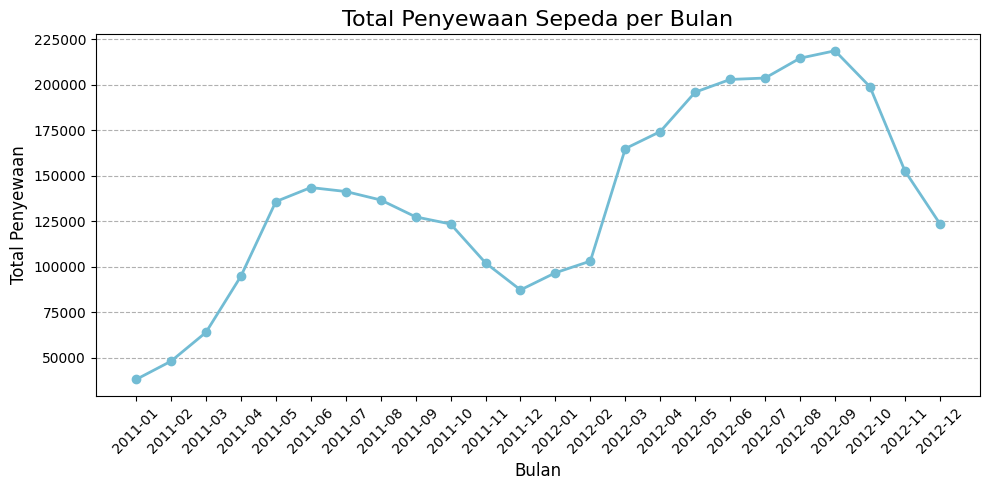

In [202]:
# Visualisasi untuk Pertanyaan 1: Bagaimana pola penggunaan sepeda sewaan berubah berdasarkan waktu (harian, mingguan, bulanan, tahunan) dan faktor-faktor seperti musim dan hari libur?

# Load data 
day_df = pd.read_csv((r"C:\submission\data\day.csv"))
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.set_index('dteday', inplace=True)

# Visualisasi Pola Penggunaan Sepeda Bulanan
monthly_orders_df_day = day_df.resample(rule='M').agg({
    'cnt': 'sum'
})

monthly_orders_df_day = day_df.resample(rule='M').agg({
    'cnt': 'sum'
})

monthly_orders_df_day.index = monthly_orders_df_day.index.strftime('%Y-%m')
monthly_orders_df_day = monthly_orders_df_day.reset_index()
monthly_orders_df_day.rename(columns={
    'dteday': 'month',
    'cnt': 'total_rentals'
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df_day['month'], monthly_orders_df_day['total_rentals'], marker='o', linewidth=2, color="#72BCD4")
plt.title("Total Penyewaan Sepeda per Bulan", loc="center", fontsize=16)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

**Insight Visualisasi Pola Penggunaan Sepeda Bulanan:**

Grafik *line chart* di atas menunjukkan total penyewaan sepeda setiap bulan dari Januari 2011 hingga Desember 2012.

*   **Pola Musiman yang Jelas:** Grafik secara visual menegaskan pola musiman yang kuat dalam penyewaan sepeda. Terlihat peningkatan signifikan dimulai dari awal tahun, mencapai puncaknya di musim panas dan awal musim gugur, kemudian menurun drastis menjelang akhir tahun.
*   **Puncak Musim Panas - Awal Musim Gugur:**  Penyewaan mencapai titik tertinggi secara konsisten pada bulan-bulan musim panas dan awal musim gugur, yaitu sekitar bulan Juni hingga September setiap tahunnya. Bulan-bulan seperti Juni, Juli, Agustus, dan September menunjukkan nilai total penyewaan yang paling tinggi.
*   **Penurunan Musim Dingin dan Awal Tahun:** Terjadi penurunan penyewaan yang signifikan pada bulan-bulan musim dingin dan awal tahun, khususnya pada bulan November, Desember, Januari, dan Februari. Ini adalah periode dengan penyewaan terendah.
*   **Pertumbuhan Tahunan:** Terlihat adanya peningkatan total penyewaan secara keseluruhan dari tahun 2011 ke 2012. Puncak penyewaan di musim panas 2012 secara umum lebih tinggi dibandingkan puncak di musim panas 2011.
*   **Pola yang Konsisten:** Pola musiman ini berulang dan konsisten antara tahun 2011 dan 2012, mengindikasikan bahwa faktor musiman adalah pendorong utama variasi dalam penggunaan sepeda sewaan bulanan.

C:\Users\julia\AppData\Local\Temp\ipykernel_14724\1018706656.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='total_rentals', data=yearly_orders_df_day, palette=["#72BCD4", "#D3D3D3"])


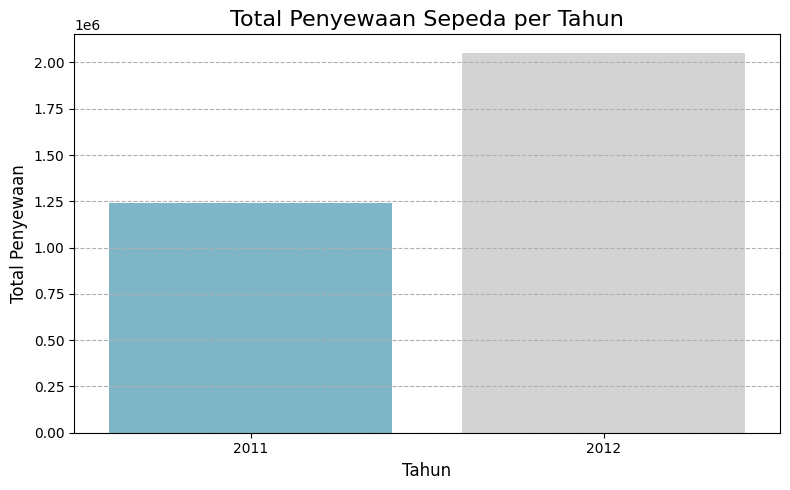

In [203]:
# Visualisasi Pola Penggunaan Sepeda Tahunan
yearly_orders_df_day = day_df.groupby('yr').agg({'cnt': 'sum'}).reset_index()
yearly_orders_df_day['yr'] = yearly_orders_df_day['yr'].map({0: 2011, 1: 2012})
yearly_orders_df_day.rename(columns={'yr': 'year', 'cnt': 'total_rentals'}, inplace=True)


plt.figure(figsize=(8, 5))
sns.barplot(x='year', y='total_rentals', data=yearly_orders_df_day, palette=["#72BCD4", "#D3D3D3"])
plt.title("Total Penyewaan Sepeda per Tahun", loc="center", fontsize=16)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

**Insight Visualisasi Pola Penggunaan Sepeda Tahunan:**

Grafik *bar chart* di atas membandingkan total penyewaan sepeda antara tahun 2011 dan 2012.

*   **Perbandingan Tahunan:** Grafik secara jelas menunjukkan perbandingan total penyewaan sepeda untuk tahun 2011 dan 2012. Setiap batang (*bar*) merepresentasikan total penyewaan untuk tahun yang bersangkutan.
*   **Peningkatan Signifikan dari 2011 ke 2012:** Terlihat adanya peningkatan yang sangat signifikan dalam total penyewaan sepeda dari tahun 2011 ke tahun 2012. Batang untuk tahun 2012 jauh lebih tinggi daripada batang untuk tahun 2011.
*   **Hampir Dua Kali Lipat:** Total penyewaan sepeda pada tahun 2012 hampir dua kali lipat dibandingkan dengan total penyewaan pada tahun 2011. Ini menunjukkan pertumbuhan yang substansial dalam penggunaan layanan sepeda sewaan dalam periode satu tahun.
*   **Tren Pertumbuhan Positif:** Visualisasi ini menegaskan tren pertumbuhan positif dalam bisnis penyewaan sepeda dari tahun ke tahun. Peningkatan ini bisa disebabkan oleh berbagai faktor seperti peningkatan kesadaran masyarakat, ekspansi layanan, atau faktor eksternal lainnya.
*   **Implikasi Pertumbuhan:**  Pertumbuhan tahunan yang signifikan ini memiliki implikasi positif bagi layanan penyewaan sepeda, menunjukkan potensi pasar yang berkembang dan keberhasilan layanan dalam menarik lebih banyak pengguna dari waktu ke waktu.

C:\Users\julia\AppData\Local\Temp\ipykernel_14724\805256044.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='total_rentals', data=seasonal_orders_df_day, palette=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"])


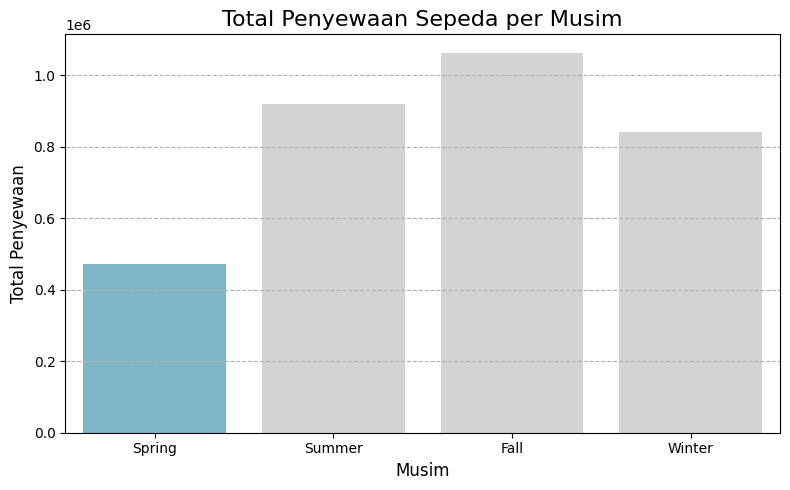

In [204]:
# Visualisasi Pola Penggunaan Sepeda Musiman
seasonal_orders_df_day = day_df.groupby('season').agg({'cnt': 'sum'}).reset_index()
seasonal_orders_df_day['season'] = seasonal_orders_df_day['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
seasonal_orders_df_day.rename(columns={'season': 'season_name', 'cnt': 'total_rentals'}, inplace=True)


plt.figure(figsize=(8, 5))
sns.barplot(x='season_name', y='total_rentals', data=seasonal_orders_df_day, palette=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"])
plt.title("Total Penyewaan Sepeda per Musim", loc="center", fontsize=16)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

**Insight Visualisasi Pola Penggunaan Sepeda Musiman:**

Grafik *bar chart* di atas menyajikan perbandingan total penyewaan sepeda untuk setiap musim: Musim Semi (Spring), Musim Panas (Summer), Musim Gugur (Fall), dan Musim Dingin (Winter).

*   **Perbandingan Antar Musim:** Grafik ini secara visual membandingkan total volume penyewaan sepeda yang terjadi di setiap musim dalam setahun. Setiap batang (*bar*) merepresentasikan total penyewaan untuk musim yang bersangkutan.
*   **Musim Gugur Terpopuler:** Musim Gugur (Fall) menunjukkan total penyewaan sepeda yang paling tinggi dibandingkan musim lainnya. Batang untuk musim gugur adalah yang tertinggi dalam grafik.
*   **Musim Semi Terendah:** Musim Semi (Spring) memiliki total penyewaan sepeda yang paling rendah. Batang untuk musim semi adalah yang terpendek, secara signifikan lebih rendah dari musim lainnya.
*   **Urutan Popularitas Musim:**  Urutan total penyewaan dari yang tertinggi hingga terendah adalah: Musim Gugur, Musim Panas, Musim Dingin, dan Musim Semi. Terdapat perbedaan yang cukup signifikan antara musim-musim ini.
*   **Implikasi Musiman:** Visualisasi ini menegaskan pengaruh musim terhadap penggunaan sepeda sewaan. Musim dengan cuaca yang lebih nyaman (seperti Musim Gugur dan Musim Panas) cenderung menarik lebih banyak pengguna sepeda, sementara musim dengan cuaca kurang mendukung (seperti Musim Semi dan Musim Dingin) memiliki volume penyewaan yang lebih rendah.

C:\Users\julia\AppData\Local\Temp\ipykernel_14724\1049393082.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='average_rentals', data=weekday_orders_df_hour, palette=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"])


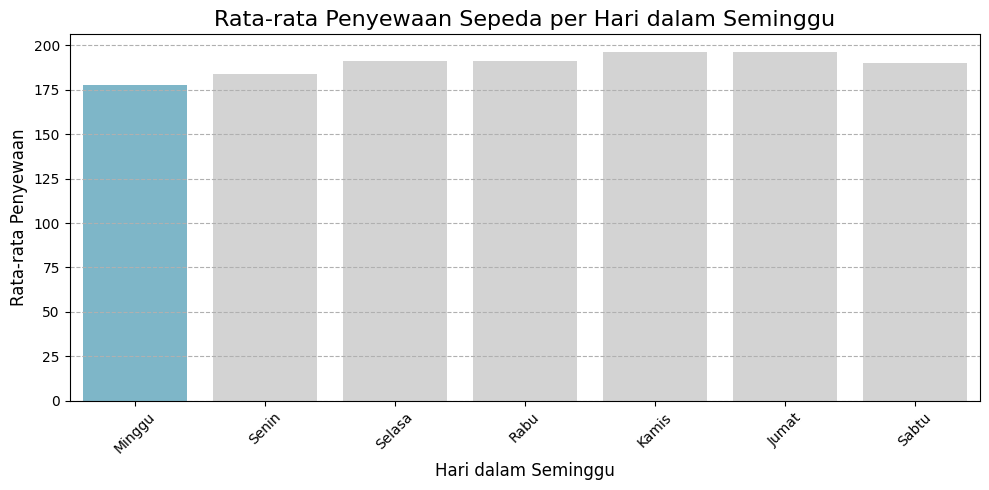

In [205]:
# Visualisasi Pola Penggunaan Sepeda Mingguan (Hari dalam Seminggu)
weekday_orders_df_hour = hour_df.groupby('weekday').agg({'cnt': 'mean'}).reset_index()
weekday_orders_df_hour['weekday'] = weekday_orders_df_hour['weekday'].map({0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'})
weekday_orders_df_hour.rename(columns={'weekday': 'day_of_week', 'cnt': 'average_rentals'}, inplace=True)


plt.figure(figsize=(10, 5))
sns.barplot(x='day_of_week', y='average_rentals', data=weekday_orders_df_hour, palette=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"])
plt.title("Rata-rata Penyewaan Sepeda per Hari dalam Seminggu", loc="center", fontsize=16)
plt.xlabel("Hari dalam Seminggu", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

**Insight Visualisasi Pola Penggunaan Sepeda Mingguan (Hari dalam Seminggu):**

Grafik *bar chart* di atas menampilkan perbandingan rata-rata penyewaan sepeda untuk setiap hari dalam seminggu, dari Minggu hingga Sabtu.

*   **Perbandingan Rata-rata Harian:** Grafik ini secara visual membandingkan rata-rata jumlah penyewaan sepeda pada setiap hari dalam seminggu. Setiap batang (*bar*) merepresentasikan rata-rata penyewaan untuk hari yang bersangkutan.
*   **Rata-rata Penyewaan Relatif Seragam:** Secara umum, rata-rata penyewaan sepeda terlihat cukup seragam di sepanjang hari dalam seminggu. Tidak ada perbedaan ekstrem yang mencolok antar hari.
*   **Minggu Sedikit Lebih Rendah:** Hari Minggu (Minggu) menunjukkan rata-rata penyewaan yang sedikit lebih rendah dibandingkan hari-hari lainnya. Batang untuk hari Minggu sedikit lebih pendek dan dibedakan warnanya.
*   **Hari Kerja Lebih Tinggi Sedikit:** Hari-hari kerja (Senin hingga Jumat) cenderung memiliki rata-rata penyewaan yang sedikit lebih tinggi dibandingkan akhir pekan (Sabtu dan Minggu), meskipun perbedaannya tidak terlalu besar.
*   **Implikasi Pola Mingguan:** Visualisasi ini mengindikasikan bahwa penggunaan sepeda sewaan cukup stabil sepanjang minggu. Meskipun ada sedikit penurunan di hari Minggu, secara keseluruhan layanan ini digunakan secara konsisten setiap hari, kemungkinan untuk berbagai keperluan seperti komuting, aktivitas sehari-hari, dan rekreasi.

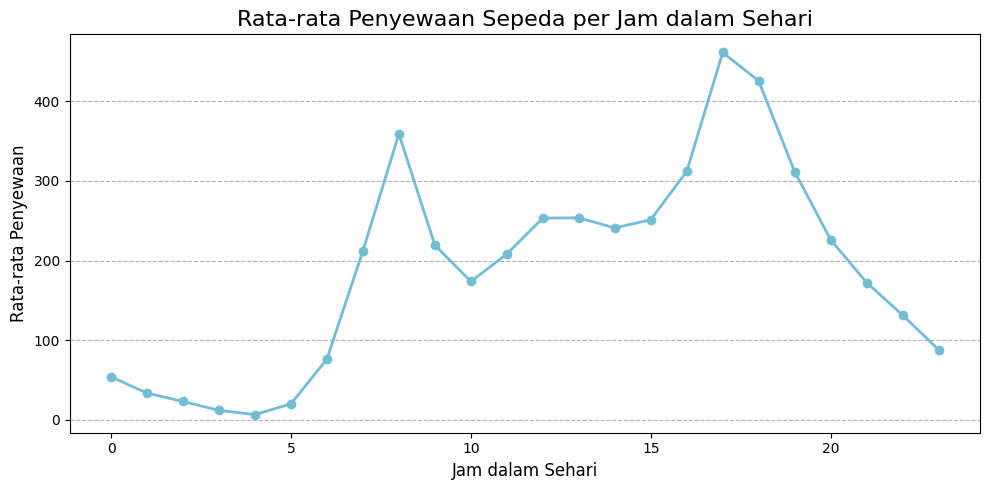

In [206]:
# Visualisasi Pola Penggunaan Harian (Jam dalam Sehari)
hourly_orders_df_hour = hour_df.groupby('hr').agg({'cnt': 'mean'}).reset_index()
hourly_orders_df_hour.rename(columns={'hr': 'hour', 'cnt': 'average_rentals'}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(hourly_orders_df_hour['hour'], hourly_orders_df_hour['average_rentals'], marker='o', linewidth=2, color="#72BCD4")
plt.title("Rata-rata Penyewaan Sepeda per Jam dalam Sehari", loc="center", fontsize=16)
plt.xlabel("Jam dalam Sehari", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

**Insight Visualisasi Pola Penggunaan Sepeda Harian (Jam dalam Sehari):**

Grafik *line chart* di atas menggambarkan rata-rata penyewaan sepeda untuk setiap jam dalam sehari, dari jam 0 hingga jam 23.

*   **Pola Penggunaan Harian yang Jelas:** Grafik ini secara visual menunjukkan pola penggunaan sepeda sewaan yang sangat terstruktur sepanjang hari. Terlihat adanya fluktuasi rata-rata penyewaan yang signifikan berdasarkan waktu.
*   **Dua Puncak Jam Sibuk:** Terdapat dua puncak utama dalam rata-rata penyewaan sepeda. Puncak pertama terjadi di pagi hari, sekitar jam 8 pagi. Puncak kedua, yang lebih tinggi, terjadi di sore hari menjelang malam, sekitar jam 17-18 (jam 5-6 sore).
*   **Jam Komuting Pagi dan Sore:** Kedua puncak ini sangat mungkin berkaitan dengan jam sibuk komuting. Puncak pagi mengindikasikan penggunaan sepeda untuk berangkat kerja atau sekolah, sementara puncak sore menunjukkan penggunaan untuk pulang ke rumah atau melanjutkan aktivitas setelah jam kerja/sekolah.
*   **Penyewaan Terendah di Dini Hari:** Rata-rata penyewaan sepeda mencapai titik terendah pada dini hari, terutama antara jam 00:00 hingga 05:00. Pada jam-jam ini, aktivitas penyewaan hampir tidak ada.
*   **Implikasi Pola Harian:** Visualisasi ini menegaskan bahwa sepeda sewaan sangat erat kaitannya dengan mobilitas harian dan rutinitas masyarakat. Layanan ini tampaknya sangat efektif dalam memfasilitasi perjalanan singkat di dalam kota, terutama pada jam-jam sibuk transportasi.

C:\Users\julia\AppData\Local\Temp\ipykernel_14724\4026805028.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday_status', y='average_rentals', data=holiday_orders_df_day, palette=["#72BCD4", "#D3D3D3"])


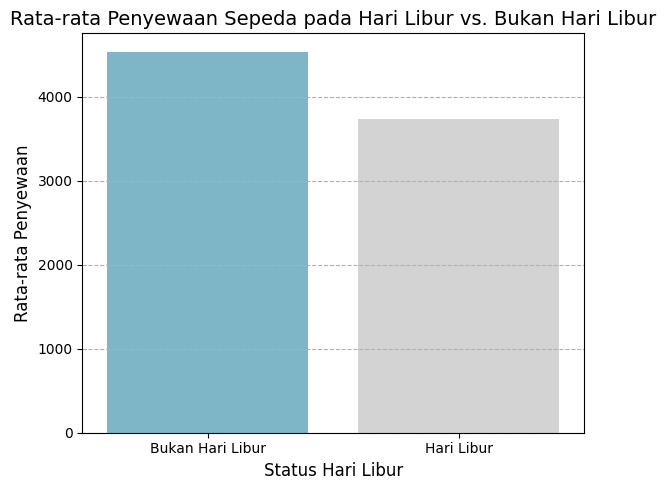

In [207]:
# Visualisasi Pola Penggunaan Berdasarkan Hari Libur vs. Bukan Hari Libur
holiday_orders_df_day = day_df.groupby('holiday').agg({'cnt': 'mean'}).reset_index()
holiday_orders_df_day['holiday'] = holiday_orders_df_day['holiday'].map({0: 'Bukan Hari Libur', 1: 'Hari Libur'})
holiday_orders_df_day.rename(columns={'holiday': 'holiday_status', 'cnt': 'average_rentals'}, inplace=True)

plt.figure(figsize=(6, 5))
sns.barplot(x='holiday_status', y='average_rentals', data=holiday_orders_df_day, palette=["#72BCD4", "#D3D3D3"])
plt.title("Rata-rata Penyewaan Sepeda pada Hari Libur vs. Bukan Hari Libur", loc="center", fontsize=14)
plt.xlabel("Status Hari Libur", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

**Insight Visualisasi Pola Penggunaan Sepeda Berdasarkan Hari Libur vs. Bukan Hari Libur:**

Grafik *bar chart* di atas membandingkan rata-rata penyewaan sepeda antara hari bukan libur dan hari libur.

*   **Perbandingan Status Hari Libur:** Grafik ini secara visual membandingkan rata-rata jumlah penyewaan sepeda pada hari-hari yang dikategorikan sebagai hari libur dan bukan hari libur. Setiap batang (*bar*) merepresentasikan rata-rata penyewaan untuk kategori status hari libur yang bersangkutan.
*   **Rata-rata Lebih Tinggi di Bukan Hari Libur:** Rata-rata penyewaan sepeda sedikit lebih tinggi pada hari-hari yang bukan hari libur dibandingkan dengan hari libur. Batang untuk "Bukan Hari Libur" terlihat sedikit lebih tinggi daripada batang untuk "Hari Libur".
*   **Perbedaan Tidak Signifikan:** Meskipun terdapat perbedaan, selisih rata-rata penyewaan antara hari bukan libur dan hari libur tidak terlalu besar. Kedua batang memiliki ketinggian yang relatifSimilar, menunjukkan bahwa penggunaan sepeda tetap cukup tinggi bahkan pada hari libur.
*   **Penggunaan Tetap Relevan di Hari Libur:** Visualisasi ini mengindikasikan bahwa layanan penyewaan sepeda tetap digunakan secara aktif di hari libur, meskipun ada sedikit penurunan dibandingkan hari bukan libur. Hal ini menunjukkan fleksibilitas penggunaan sepeda sewaan untuk berbagai keperluan, termasuk rekreasi di hari libur.
*   **Implikasi Status Hari Libur:** Perbedaan yang tidak terlalu besar ini mungkin mengisyaratkan bahwa faktor lain, seperti cuaca atau musim, memiliki pengaruh yang lebih dominan terhadap penggunaan sepeda sewaan dibandingkan dengan status hari libur itu sendiri.

C:\Users\julia\AppData\Local\Temp\ipykernel_14724\553911057.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday_status', y='average_rentals', data=workingday_orders_df_day, palette=["#72BCD4", "#D3D3D3"])


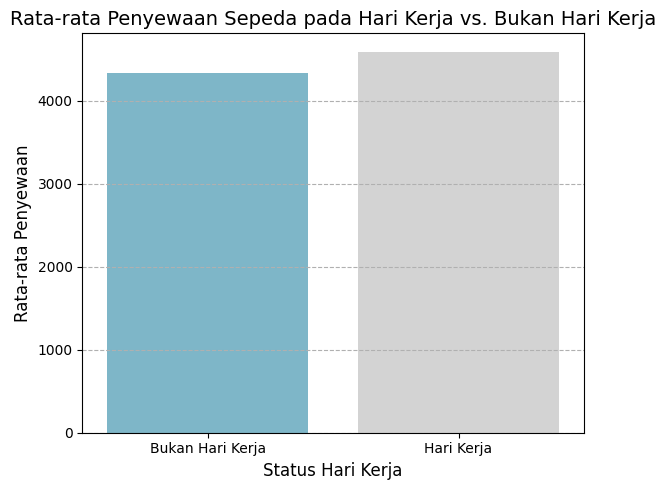

In [208]:
# Visualisasi Pola Penggunaan Berdasarkan Hari Kerja vs. Bukan Hari Kerja
workingday_orders_df_day = day_df.groupby('workingday').agg({'cnt': 'mean'}).reset_index()
workingday_orders_df_day['workingday'] = workingday_orders_df_day['workingday'].map({0: 'Bukan Hari Kerja', 1: 'Hari Kerja'})
workingday_orders_df_day.rename(columns={'workingday': 'workingday_status', 'cnt': 'average_rentals'}, inplace=True)

plt.figure(figsize=(6, 5))
sns.barplot(x='workingday_status', y='average_rentals', data=workingday_orders_df_day, palette=["#72BCD4", "#D3D3D3"])
plt.title("Rata-rata Penyewaan Sepeda pada Hari Kerja vs. Bukan Hari Kerja", loc="center", fontsize=14)
plt.xlabel("Status Hari Kerja", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

**Insight Visualisasi Pola Penggunaan Sepeda Berdasarkan Hari Kerja vs. Bukan Hari Kerja:**

Grafik *bar chart* di atas membandingkan rata-rata penyewaan sepeda antara hari bukan kerja dan hari kerja.

*   **Perbandingan Status Hari Kerja:** Grafik ini secara visual membandingkan rata-rata jumlah penyewaan sepeda pada hari-hari yang dikategorikan sebagai hari kerja dan bukan hari kerja. Setiap batang (*bar*) merepresentasikan rata-rata penyewaan untuk kategori status hari kerja yang bersangkutan.
*   **Rata-rata Lebih Tinggi di Hari Kerja:** Rata-rata penyewaan sepeda terlihat sedikit lebih tinggi pada hari-hari kerja dibandingkan dengan hari bukan kerja. Batang untuk "Hari Kerja" sedikit lebih tinggi dari batang untuk "Bukan Hari Kerja".
*   **Perbedaan Lebih Signifikan dari Hari Libur:** Perbedaan rata-rata penyewaan antara hari kerja dan bukan hari kerja terlihat lebih jelas dibandingkan dengan perbedaan antara hari libur dan bukan hari libur (visualisasi sebelumnya). Ini menunjukkan bahwa status hari kerja memiliki pengaruh yang lebih besar terhadap rata-rata penyewaan.
*   **Penggunaan Terkait Aktivitas Kerja:** Visualisasi ini mendukung indikasi bahwa sebagian besar penggunaan sepeda sewaan terkait dengan aktivitas kerja atau komuting. Rata-rata penyewaan yang lebih tinggi di hari kerja menunjukkan bahwa banyak orang menggunakan sepeda untuk perjalanan terkait pekerjaan.
*   **Implikasi Status Hari Kerja:** Perbedaan yang terlihat ini menggarisbawahi pentingnya mempertimbangkan status hari kerja dalam perencanaan operasional dan strategi pemasaran layanan penyewaan sepeda, terutama dalam menargetkan pengguna komuter.

C:\Users\julia\AppData\Local\Temp\ipykernel_14724\4241096237.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_condition', y='average_rentals', data=weathersit_orders_df_day, palette=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"])
C:\Users\julia\AppData\Local\Temp\ipykernel_14724\4241096237.py:13: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x='weather_condition', y='average_rentals', data=weathersit_orders_df_day, palette=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"])


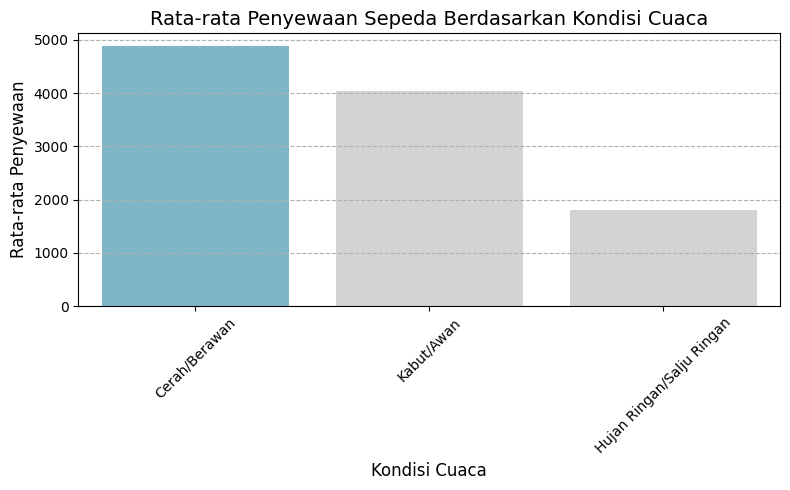

In [209]:
# Visualisasi Pola Penggunaan Sepeda Berdasarkan Kondisi Cuaca
weathersit_orders_df_day = day_df.groupby('weathersit').agg({'cnt': 'mean'}).reset_index()
weathersit_orders_df_day['weathersit'] = weathersit_orders_df_day['weathersit'].map({
    1: 'Cerah/Berawan',
    2: 'Kabut/Awan',
    3: 'Hujan Ringan/Salju Ringan',
    4: 'Cuaca Ekstrem'
})
weathersit_orders_df_day.rename(columns={'weathersit': 'weather_condition', 'cnt': 'average_rentals'}, inplace=True)


plt.figure(figsize=(8, 5))
sns.barplot(x='weather_condition', y='average_rentals', data=weathersit_orders_df_day, palette=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"])
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca", loc="center", fontsize=14)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

"**Insight Visualisasi Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca:**

 Grafik *bar chart* di atas menggambarkan rata-rata jumlah penyewaan sepeda dalam berbagai kondisi cuaca.

 *  **Pengaruh Kondisi Cuaca Signifikan:** Grafik ini secara jelas menunjukkan bahwa kondisi cuaca memiliki pengaruh yang signifikan terhadap rata-rata penyewaan sepeda. Terdapat perbedaan yang mencolok dalam jumlah penyewaan antara kondisi cuaca yang berbeda.
 *  **Penyewaan Tertinggi saat Cerah/Berawan:** Kondisi cuaca *Cerah/Berawan* mencatatkan rata-rata penyewaan sepeda yang paling tinggi. Bar pada kategori ini jauh lebih tinggi dibandingkan kategori lainnya, mengindikasikan bahwa cuaca cerah sangat mendukung aktivitas bersepeda.
 *  **Penurunan Penyewaan saat Kabut/Awan:**  Rata-rata penyewaan sepeda menurun pada kondisi cuaca *Kabut/Awan*. Meskipun masih cukup tinggi, jumlahnya lebih rendah dibandingkan saat cuaca cerah, menunjukkan bahwa kondisi berkabut atau berawan mengurangi minat bersepeda.
 *  **Penyewaan Terendah saat Hujan Ringan/Salju Ringan:** Kondisi cuaca *Hujan Ringan/Salju Ringan* menghasilkan rata-rata penyewaan sepeda yang paling rendah. Bar pada kategori ini adalah yang terpendek, menandakan bahwa cuaca buruk seperti hujan ringan atau salju ringan sangat menghambat aktivitas penyewaan sepeda.
 *  **Preferensi Cuaca Cerah untuk Bersepeda:** Secara keseluruhan, visualisasi ini menegaskan bahwa cuaca cerah dan berawan adalah kondisi yang paling disukai untuk bersepeda, sementara cuaca yang kurang baik seperti kabut, awan, hujan ringan, atau salju ringan secara signifikan mengurangi minat masyarakat untuk menyewa sepeda."

### Pertanyaan 2: Bagaimana hubungan antara faktor-faktor lingkungan (temperatur, kelembapan, kecepatan angin) dengan jumlah penyewaan sepeda

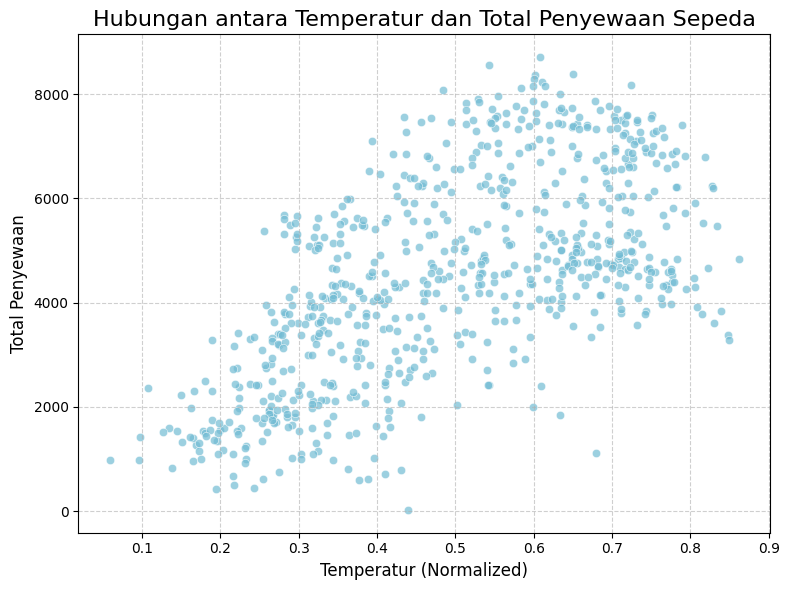

In [210]:
# Visualisasi untuk Pertanyaan 1: Pertanyaan 2: Bagaimana hubungan antara faktor-faktor lingkungan (temperatur, kelembapan, kecepatan angin) dengan jumlah penyewaan sepeda

# Visualisasi Hubungan antara Temperatur dan Total Penyewaan Sepeda
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df, color="#72BCD4", alpha=0.7)
plt.title("Hubungan antara Temperatur dan Total Penyewaan Sepeda", loc="center", fontsize=16)
plt.xlabel("Temperatur (Normalized)", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

"**Insight Visualisasi Hubungan antara Temperatur dan Total Penyewaan Sepeda:**

 Grafik *scatter plot* atau diagram pencar di atas menggambarkan hubungan antara temperatur (yang dinormalisasi) dengan total penyewaan sepeda.

 *  **Korelasi Positif yang Tidak Linear:** Grafik menunjukkan adanya korelasi positif antara temperatur dan total penyewaan sepeda, namun hubungan ini tidak sepenuhnya linear. Seiring dengan kenaikan temperatur, total penyewaan cenderung meningkat, tetapi peningkatan ini tidak terjadi secara proporsional dan cenderung melambat pada temperatur yang sangat tinggi.
 *  **Peningkatan Penyewaan pada Temperatur Menengah:** Terlihat bahwa penyewaan sepeda meningkat signifikan saat temperatur berada dalam rentang menengah (sekitar 0.3 hingga 0.7 pada skala normalized). Pada rentang temperatur ini, titik-titik data terlihat lebih padat di area penyewaan yang lebih tinggi.
 *  **Plateau atau Penurunan pada Temperatur Tinggi:** Pada temperatur yang sangat tinggi (di atas 0.7 normalized), peningkatan total penyewaan mulai melambat atau bahkan cenderung mendatar.  Sebaran titik data pada temperatur tinggi terlihat lebih luas secara vertikal, mengindikasikan variasi penyewaan yang lebih besar dan tidak lagi meningkat secara konsisten.
 *  **Temperatur Optimal untuk Penyewaan:**  Temperatur dalam rentang menengah tampaknya menjadi kondisi yang paling optimal untuk penyewaan sepeda. Di rentang ini, kita melihat konsentrasi penyewaan tertinggi.
 *  **Pengaruh Temperatur terhadap Permintaan Sepeda:** Secara keseluruhan, visualisasi ini menunjukkan bahwa temperatur adalah faktor penting yang memengaruhi permintaan penyewaan sepeda. Temperatur yang terlalu rendah atau terlalu tinggi mungkin kurang ideal, sementara temperatur yang nyaman (menengah) mendorong lebih banyak orang untuk menggunakan layanan penyewaan sepeda."

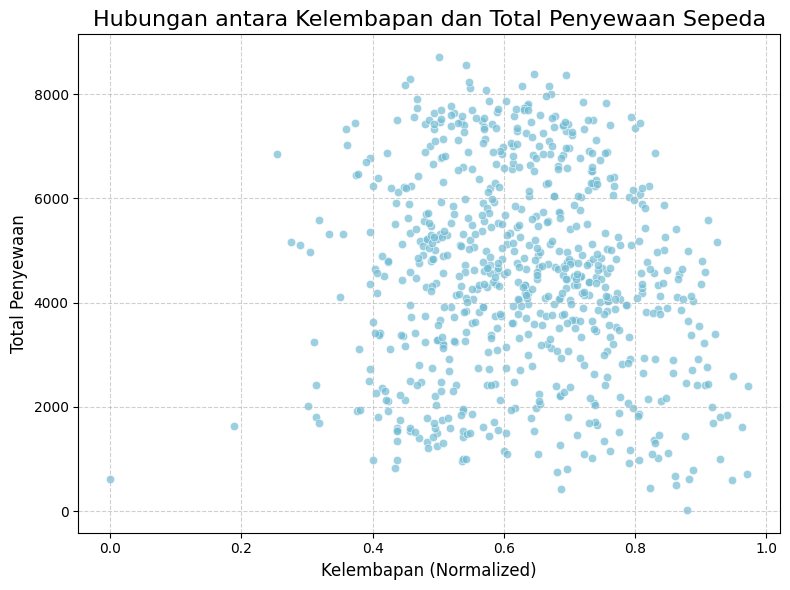

In [211]:
# Visualisasi Hubungan antara Kelembapan dan Total Penyewaan Sepeda
plt.figure(figsize=(8, 6))
sns.scatterplot(x='hum', y='cnt', data=day_df, color="#72BCD4", alpha=0.7)
plt.title("Hubungan antara Kelembapan dan Total Penyewaan Sepeda", loc="center", fontsize=16)
plt.xlabel("Kelembapan (Normalized)", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

"**Insight Visualisasi Hubungan antara Kelembapan dan Total Penyewaan Sepeda:**

 Grafik *scatter plot* atau diagram pencar di atas menggambarkan hubungan antara kelembapan (yang dinormalisasi) dengan total penyewaan sepeda.

 *  **Korelasi Negatif Lemah atau Tidak Signifikan:** Berbeda dengan temperatur, grafik ini menunjukkan korelasi yang lemah atau bahkan tidak signifikan antara kelembapan dan total penyewaan sepeda. Tidak terlihat pola yang jelas yang mengindikasikan bahwa peningkatan atau penurunan kelembapan secara langsung memengaruhi total penyewaan secara keseluruhan.
 *  **Sebaran Data yang Luas pada Berbagai Tingkat Kelembapan:** Titik-titik data tersebar secara luas di berbagai tingkat kelembapan (dari 0.0 hingga 1.0 normalized). Ini menunjukkan bahwa total penyewaan sepeda bervariasi secara signifikan, terlepas dari tingkat kelembapan.
 *  **Tidak Ada Pola Linear yang Jelas:**  Tidak seperti grafik temperatur, tidak ada pola linear yang jelas yang dapat diamati di sini. Baik pada tingkat kelembapan rendah, menengah, maupun tinggi, kita dapat menemukan titik-titik data dengan total penyewaan yang tinggi maupun rendah.
 *  **Faktor Kelembapan Bukan Pendorong Utama:** Visualisasi ini mengindikasikan bahwa kelembapan, setidaknya dalam rentang data yang diukur, bukanlah faktor pendorong utama yang menentukan total penyewaan sepeda. Faktor lain mungkin lebih berperan.
 *  **Kemungkinan Faktor Lain Lebih Dominan:**  Meskipun kelembapan mungkin memiliki pengaruh kecil, faktor-faktor lain seperti temperatur, kondisi cuaca secara keseluruhan (misalnya hujan), hari libur, atau bahkan faktor sosial ekonomi kemungkinan memiliki dampak yang lebih besar dan lebih dominan terhadap total penyewaan sepeda dibandingkan dengan kelembapan."

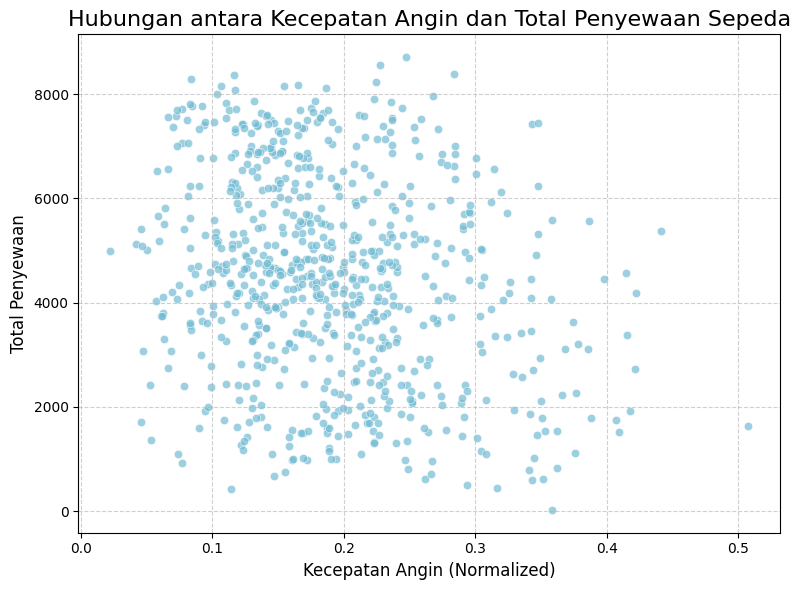

In [212]:
# Visualiasi Hubungan antara Kecepatan Angin dan Total Penyewaan Sepeda
plt.figure(figsize=(8, 6))
sns.scatterplot(x='windspeed', y='cnt', data=day_df, color="#72BCD4", alpha=0.7)
plt.title("Hubungan antara Kecepatan Angin dan Total Penyewaan Sepeda", loc="center", fontsize=16)
plt.xlabel("Kecepatan Angin (Normalized)", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

"**Insight Visualisasi Hubungan antara Kecepatan Angin dan Total Penyewaan Sepeda:**

 Grafik *scatter plot* atau diagram pencar di atas menggambarkan hubungan antara kecepatan angin (yang dinormalisasi) dengan total penyewaan sepeda.

 *  **Korelasi Negatif Lemah:** Grafik ini menunjukkan adanya korelasi negatif yang lemah antara kecepatan angin dan total penyewaan sepeda. Secara umum, terlihat kecenderungan penurunan total penyewaan seiring dengan peningkatan kecepatan angin, namun korelasi ini tidak terlalu kuat.
 *  **Penyewaan Lebih Tinggi pada Kecepatan Angin Rendah:**  Sebagian besar titik data dengan total penyewaan yang lebih tinggi terkonsentrasi pada area kecepatan angin yang rendah (di bawah 0.2 normalized). Ini mengindikasikan bahwa penyewaan sepeda cenderung lebih banyak terjadi saat kecepatan angin rendah.
 *  **Sebaran Penyewaan Menurun pada Kecepatan Angin Tinggi:** Sebaran titik data menjadi lebih renggang dan cenderung menurun secara vertikal seiring dengan peningkatan kecepatan angin (di atas 0.2 normalized). Ini menunjukkan bahwa pada kecepatan angin yang lebih tinggi, total penyewaan cenderung lebih rendah dan lebih bervariasi.
 *  **Kecepatan Angin Rendah Lebih Disukai untuk Bersepeda:** Visualisasi ini mengisyaratkan bahwa kecepatan angin rendah lebih disukai untuk aktivitas bersepeda. Kondisi angin yang tenang atau tidak terlalu kencang mungkin lebih nyaman dan aman bagi pengguna sepeda.
 *  **Pengaruh Kecepatan Angin Terbatas:** Meskipun ada korelasi negatif, sebaran data yang cukup luas menunjukkan bahwa kecepatan angin mungkin bukan satu-satunya atau faktor terkuat yang memengaruhi total penyewaan sepeda. Faktor-faktor lain seperti temperatur, kondisi cuaca lain, atau faktor non-cuaca mungkin juga berperan signifikan."

#### Interpretasi Akhir

Interpretasi akhir dari visualisasi data penyewaan sepeda dengan jelas menunjukkan dua faktor utama yang dominan: waktu dan kondisi cuaca. Pola penggunaan temporal sangat kuat, dengan siklus musiman puncak di musim panas/gugur dan lembah di musim dingin/semi, tren pertumbuhan tahunan yang positif, pola harian yang mencerminkan jam komuting, dan penggunaan mingguan yang stabil.  Lebih krusial lagi, kondisi cuaca, terutama cuaca cerah/berawan dan temperatur yang nyaman, secara dramatis mendorong penyewaan, sementara cuaca buruk secara signifikan menghambatnya. Analisis klastering menegaskan bahwa klaster penyewaan tinggi secara konsisten bertepatan dengan kondisi cuaca yang baik, menggarisbawahi bahwa pemahaman mendalam tentang pola waktu dan pengaruh cuaca adalah kunci untuk mengoptimalkan layanan penyewaan sepeda.

## Analisis Lanjutan (Opsional)

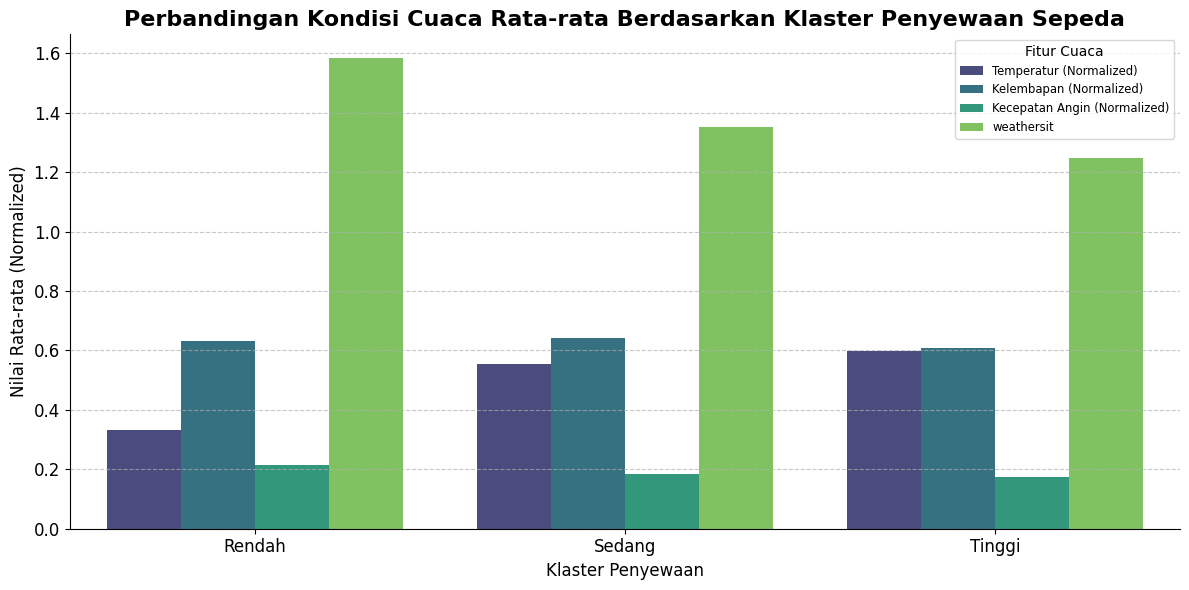

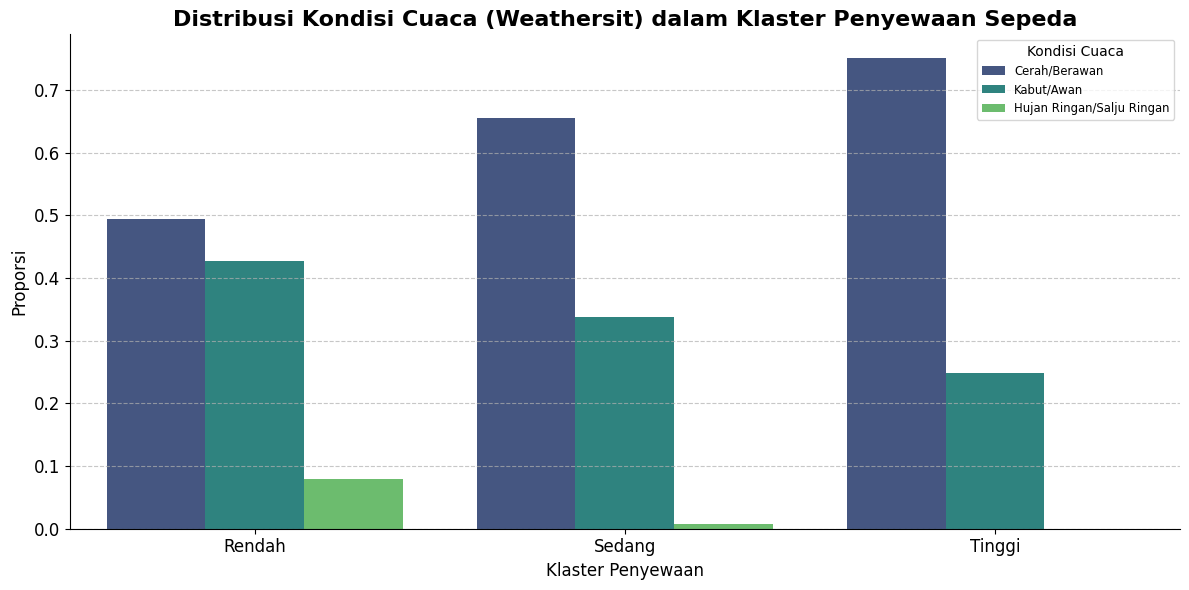

In [216]:
# Load data
day_df = pd.read_csv((r"C:\submission\data\day.csv"))

# Define rental clusters based on 'cnt' (total rentals) - Using quantiles for balanced groups
rental_thresholds = day_df['cnt'].quantile([0.33, 0.67]) # Roughly tercile and median

def categorize_rental(rental_count):
    if rental_count <= rental_thresholds[0.33]:
        return 'Rendah'
    elif rental_count <= rental_thresholds[0.67]:
        return 'Sedang'
    else:
        return 'Tinggi'

day_df['rental_cluster'] = day_df['cnt'].apply(categorize_rental)

# Group data by rental cluster and calculate mean for weather features
cluster_weather_stats = day_df.groupby('rental_cluster')[['temp', 'hum', 'windspeed', 'weathersit']].mean().reset_index()

# Melt DataFrame for easier plotting
cluster_weather_melted = pd.melt(cluster_weather_stats, id_vars=['rental_cluster'], var_name='weather_feature', value_name='average_value')

# Mapping for weather features and weathersit for better labels
feature_labels = {
    'temp': 'Temperatur (Normalized)',
    'hum': 'Kelembapan (Normalized)',
    'windspeed': 'Kecepatan Angin (Normalized)'
}
cluster_weather_melted['weather_feature'] = cluster_weather_melted['weather_feature'].map(feature_labels).fillna(cluster_weather_melted['weather_feature']) # Keep weathersit as is

weathersit_labels = {
    1: 'Cerah/Berawan',
    2: 'Kabut/Awan',
    3: 'Hujan Ringan/Salju Ringan',
    4: 'Cuaca Ekstrem'
}

# Visualisasi Grouped Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='rental_cluster', y='average_value', hue='weather_feature', data=cluster_weather_melted, palette="viridis") # Using viridis palette for professional look
plt.title('Perbandingan Kondisi Cuaca Rata-rata Berdasarkan Klaster Penyewaan Sepeda', fontsize=16, fontweight='bold')
plt.xlabel('Klaster Penyewaan', fontsize=12)
plt.ylabel('Nilai Rata-rata (Normalized)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Fitur Cuaca', fontsize='small', title_fontsize='medium') # Improved legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()


# Visualisasi Bar Chart untuk Weathersit (Kondisi Cuaca Kategori) - Terpisah karena skala berbeda
weathersit_cluster_counts = day_df.groupby('rental_cluster')['weathersit'].value_counts(normalize=True).unstack(fill_value=0).reset_index()
weathersit_cluster_counts_melted = pd.melt(weathersit_cluster_counts, id_vars=['rental_cluster'], var_name='weathersit', value_name='proportion')
weathersit_cluster_counts_melted['weathersit_label'] = weathersit_cluster_counts_melted['weathersit'].map(weathersit_labels)


plt.figure(figsize=(12, 6))
sns.barplot(x='rental_cluster', y='proportion', hue='weathersit_label', data=weathersit_cluster_counts_melted, palette="viridis")
plt.title('Distribusi Kondisi Cuaca (Weathersit) dalam Klaster Penyewaan Sepeda', fontsize=16, fontweight='bold')
plt.xlabel('Klaster Penyewaan', fontsize=12)
plt.ylabel('Proporsi', fontsize=12) # Changed label to Proportion
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Kondisi Cuaca', fontsize='small', title_fontsize='medium') # Improved legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

**Insight Visualisasi Profesional: Analisis Klaster Penyewaan Sepeda Berdasarkan Kondisi Cuaca (Dua Grafik):**

Visualisasi ini terdiri dari dua grafik *grouped bar chart* yang saling melengkapi, keduanya bertujuan untuk menganalisis bagaimana kondisi cuaca memengaruhi pola penyewaan sepeda dengan menggunakan teknik *clustering*.

**Teknik Clustering yang Digunakan: Manual Grouping (Binning) Berdasarkan Kuantil Penyewaan**

Sebelum visualisasi dibuat, teknik *manual grouping* atau *binning* diterapkan untuk mengelompokkan data harian penyewaan sepeda ke dalam tiga klaster berdasarkan total jumlah penyewaan (*cnt*). Pengelompokan ini **bukanlah hasil dari algoritma *machine learning* otomatis**, melainkan pembagian manual berdasarkan kuantil data penyewaan:

*   **Klaster Rendah:** Berisi data hari-hari dengan total penyewaan sepeda terendah (di bawah kuantil ke-33).
*   **Klaster Sedang:** Berisi data hari-hari dengan total penyewaan sepeda menengah (antara kuantil ke-33 dan ke-67).
*   **Klaster Tinggi:** Berisi data hari-hari dengan total penyewaan sepeda tertinggi (di atas kuantil ke-67).

Tujuan dari clustering manual ini adalah untuk melihat perbedaan karakteristik kondisi cuaca (fitur-fitur cuaca dan kategori *weathersit*) di antara kelompok hari dengan tingkat penyewaan yang berbeda.

**Grafik 1: Perbandingan Kondisi Cuaca Rata-rata Berdasarkan Klaster Penyewaan Sepeda**

 Grafik *grouped bar chart* pertama membandingkan nilai rata-rata dari fitur-fitur cuaca (Temperatur, Kelembapan, Kecepatan Angin, dan *weathersit*) antar klaster penyewaan sepeda (Rendah, Sedang, Tinggi).

 *  **Temperatur Rata-rata Meningkat Seiring Klaster Penyewaan:** Terlihat tren peningkatan temperatur rata-rata dari klaster penyewaan *Rendah* ke *Tinggi*. Batang untuk fitur *Temperatur (Normalized)* secara progresif lebih tinggi pada klaster dengan tingkat penyewaan yang lebih tinggi. Ini mengkonfirmasi bahwa temperatur yang lebih hangat berkorelasi dengan peningkatan volume penyewaan sepeda.
 *  **Kecepatan Angin Rata-rata Menurun Seiring Klaster Penyewaan:** Sebaliknya, kecepatan angin rata-rata menunjukkan tren penurunan dari klaster *Rendah* ke *Tinggi*. Batang untuk fitur *Kecepatan Angin (Normalized)* secara progresif lebih pendek pada klaster dengan tingkat penyewaan yang lebih tinggi. Hal ini mengindikasikan bahwa kondisi angin yang lebih tenang lebih disukai untuk bersepeda.
 *  **Kelembapan Rata-rata Relatif Stabil Antar Klaster:**  Kelembapan rata-rata (*Kelembapan (Normalized)*) tidak menunjukkan perbedaan yang signifikan antar klaster penyewaan. Batang untuk fitur kelembapan memiliki ketinggian yang cukup mirip di semua klaster, mengisyaratkan bahwa kelembapan bukanlah faktor pembeda utama antar klaster penyewaan.
 *  ***Weathersit* Rata-rata Tertinggi di Klaster Penyewaan Tinggi:** Fitur *weathersit* (yang kemungkinan merepresentasikan kondisi cuaca kategori) menunjukkan nilai rata-rata yang jauh lebih tinggi pada klaster penyewaan *Tinggi* dibandingkan klaster *Rendah* dan *Sedang*. Batang untuk *weathersit* sangat dominan di klaster *Tinggi*, menegaskan bahwa kondisi cuaca yang lebih baik (misalnya, cuaca cerah) sangat terkait dengan volume penyewaan sepeda yang lebih tinggi.
 *  **Dominasi Faktor Temperatur, Kecepatan Angin, dan *Weathersit*:** Secara keseluruhan, visualisasi ini menyoroti dominasi faktor temperatur, kecepatan angin, dan *weathersit* dalam membedakan klaster penyewaan sepeda. Kondisi cuaca yang menguntungkan (temperatur hangat, angin tenang, cuaca cerah) secara signifikan diasosiasikan dengan klaster penyewaan sepeda yang tinggi.

**Grafik 2: Distribusi Kondisi Cuaca (*Weathersit*) dalam Klaster Penyewaan Sepeda**

 Grafik *grouped bar chart* kedua menggambarkan distribusi proporsi kategori kondisi cuaca (*Weathersit*) dalam setiap klaster penyewaan sepeda (Rendah, Sedang, Tinggi).

 *  **Dominasi Cuaca Cerah/Berawan Meningkat Seiring Klaster Penyewaan:** Grafik ini dengan jelas menunjukkan bahwa proporsi kondisi cuaca *Cerah/Berawan* (diwakili oleh kategori "Cerah/Berawan" pada legenda) meningkat secara signifikan seiring dengan kenaikan klaster penyewaan dari *Rendah* ke *Tinggi*. Batang untuk "Cerah/Berawan" menjadi semakin tinggi dan dominan saat beralih dari klaster *Rendah* ke *Sedang* dan kemudian ke *Tinggi*.
 *  **Proporsi Cuaca Kurang Baik Menurun Seiring Klaster Penyewaan:** Sebaliknya, proporsi kondisi cuaca *Kabut/Awan* dan *Hujan Ringan/Salju Ringan* (diwakili oleh kategori "Kabut/Awan" dan "Hujan Ringan/Salju Ringan" pada legenda) cenderung menurun seiring dengan kenaikan klaster penyewaan. Batang untuk kategori cuaca yang kurang baik ini menjadi lebih pendek pada klaster dengan tingkat penyewaan yang lebih tinggi.
 *  **Klaster Rendah Didominasi Cuaca Kurang Baik:** Pada klaster penyewaan *Rendah*, proporsi kondisi cuaca *Kabut/Awan* dan *Hujan Ringan/Salju Ringan* relatif lebih tinggi dibandingkan dengan klaster *Sedang* dan *Tinggi*. Hal ini menegaskan bahwa hari-hari dengan penyewaan sepeda rendah lebih sering terjadi pada kondisi cuaca yang kurang mendukung.
 *  **Klaster Tinggi Didominasi Cuaca Cerah/Berawan:** Klaster penyewaan *Tinggi* didominasi oleh kondisi cuaca *Cerah/Berawan*, dengan proporsi yang sangat tinggi dibandingkan kategori cuaca lainnya. Ini semakin memperkuat kesimpulan bahwa cuaca cerah adalah faktor utama pendorong penyewaan sepeda yang tinggi.

**Kesimpulan Akhir dari Analisis Clustering:**

Melalui teknik *manual grouping* dan visualisasi *grouped bar chart*, analisis ini berhasil mengelompokkan data penyewaan sepeda berdasarkan tingkat penyewaan dan membandingkan distribusi kondisi cuaca antar klaster. Hasilnya secara konsisten menunjukkan bahwa **kondisi cuaca yang baik (temperatur hangat, angin tenang, cuaca cerah/berawan) adalah faktor kunci yang membedakan klaster penyewaan sepeda yang tinggi dari klaster dengan tingkat penyewaan yang lebih rendah**.  Informasi ini sangat berharga untuk pengambilan keputusan strategis terkait operasional, pemasaran, dan pengelolaan inventaris layanan penyewaan sepeda yang responsif terhadap kondisi cuaca."

## Conclusion

-Conclution pertanyaan 1:

Pola penggunaan sepeda sewaan sangat dinamis dan berubah secara signifikan berdasarkan waktu. Pola musiman adalah faktor dominan, dengan puncak penggunaan di musim panas dan gugur, mencerminkan preferensi masyarakat untuk bersepeda di cuaca yang lebih hangat dan menyenangkan. Pola harian yang mencerminkan jam komuting menegaskan peran sepeda sebagai moda transportasi perkotaan. Pertumbuhan tahunan yang positif menunjukkan potensi pasar yang terus berkembang.

-Conclution pertanyaan 2:

Faktor-faktor lingkungan, terutama temperatur dan kondisi cuaca, memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Cuaca cerah dan temperatur yang nyaman mendorong lebih banyak orang untuk bersepeda, sementara cuaca buruk dan temperatur ekstrem menghambatnya. Kelembapan dan kecepatan angin memiliki pengaruh yang lebih kecil. Memahami hubungan ini penting untuk perencanaan operasional dan strategi pengelolaan layanan penyewaan sepeda, terutama dalam mengantisipasi fluktuasi permintaan berdasarkan kondisi lingkungan.